# Santiago González Silot TFG Fake News

## Instalación de paquetes necesarios

In [1]:
# Instalamos lo necesarios
!pip install -q -U tensorflow-text
!pip install -q tf-models-official
!pip install transformers
!pip install pytorch-pretrained-bert pytorch-nlp
!pip install sentencepiece
!pip install keras-self-attention
!pip install tweet-preprocessor
!pip install emoji
!pip install attention
!pip install pyLDAvis
!pip install latex
!pip install graphviz
!pip install dtreeviz

     |████████████████████████████████| 4.6 MB 8.9 MB/s 
     |████████████████████████████████| 511.7 MB 5.9 kB/s 
     |████████████████████████████████| 1.6 MB 43.9 MB/s 
     |████████████████████████████████| 438 kB 51.4 MB/s 
     |████████████████████████████████| 5.8 MB 52.2 MB/s 
     |████████████████████████████████| 2.1 MB 7.4 MB/s 
     |████████████████████████████████| 1.2 MB 61.4 MB/s 
     |████████████████████████████████| 636 kB 55.2 MB/s 
     |████████████████████████████████| 1.1 MB 49.7 MB/s 
     |████████████████████████████████| 43 kB 2.0 MB/s 
     |████████████████████████████████| 48.3 MB 186 kB/s 
     |████████████████████████████████| 237 kB 65.7 MB/s 
     |████████████████████████████████| 99 kB 9.9 MB/s 
     |████████████████████████████████| 92 kB 11.7 MB/s 
     |████████████████████████████████| 352 kB 66.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |███████████████████████████████

## Importación de librerías necesarias

In [2]:
import os
import shutil
import pandas as pd
import tensorflow as tf
print(tf.__version__)
import tensorflow_hub as hub
print(hub.__version__)
from wordcloud import WordCloud
import tensorflow_text as text
print(text.__version__)
from official.nlp import optimization  # to create AdamW optimizer
from transformers import BertModel#, RobertaModel
import numpy as np
import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer

# from transformers import
import pandas as pd
#import torch
# from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
import nltk
import re
from nltk.corpus import stopwords
from keras_self_attention import SeqSelfAttention
import tensorflow as tf
from attention import Attention
from transformers import AutoTokenizer, AutoModel, TFAutoModel,TFRobertaForSequenceClassification, TFBertModel, TFRobertaModel, AutoConfig

import preprocessor as pp
import emoji
import torch
import itertools
import seaborn as sns
from nltk.util import ngrams
import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from PIL import Image
from sklearn.metrics import plot_confusion_matrix
from tensorflow.keras.optimizers import Adam, Adamax

nltk.download('punkt')
nltk.download('wordnet')



tf.get_logger().setLevel('ERROR')
nltk.download('stopwords')

stops_en = set(stopwords.words("english"))
stops_es = set(stopwords.words("spanish"))

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import GradientBoostingClassifier

from dtreeviz.trees import dtreeviz # remember to load the package



2.9.1
0.12.0
2.9.0


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Conectamos Colab con Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Definición de funciones

In [4]:
df_stops_es = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/México/stops_spanish.txt", sep=" ", header=None, encoding="utf-8")
for word in df_stops_es[0]:
  stops_es.add(word)


# Comprueba que hay una GPU disponible y en caso afirmativo indica cual
def comprobarGPU():
  if torch.cuda.is_available():    

      # Tell PyTorch to use the GPU.    
      device = torch.device("cuda")

      print('There are %d GPU(s) available.' % torch.cuda.device_count())

      print('We will use the GPU:', torch.cuda.get_device_name(0))

  # If not...
  else:
      print('No GPU available, using the CPU instead.')
      device = torch.device("cpu")

def plot_confusion_matrixScikit(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.grid(False)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    #plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.xlabel('Predicted label')
    plt.show()


def mostrarEvolucion(hist):

  loss = hist.history['loss']
  val_loss = hist.history['val_loss']
  plt.plot(loss)
  plt.plot(val_loss)
  plt.legend(['Training loss', 'Validation loss'])
  plt.show()

  acc = hist.history['accuracy']
  val_acc = hist.history['val_accuracy']
  plt.plot(acc)
  plt.plot(val_acc)
  plt.legend(['Training accuracy', 'Validation accuracy'])
  plt.show()



def cleantext(string, idioma="EN"):
    text = string.lower().split()
    text = " ".join(text)
    text = re.sub(r"http(\S)+",' ',text)    
    text = re.sub(r"www(\S)+",' ',text)
    text = re.sub(r"&",' and ',text)  
    text = text.replace('&amp',' ')
    text = re.sub(r"[^0-9a-zA-Z]+",' ',text)
    text = text.split()

    if idioma == "EN":
      text = [w for w in text if not w in stops_en]
    else:
      text = [w for w in text if not w in stops_es]

    text = " ".join(text)
    return text

# Revisar
def cleanhastag(text):
  text = text.replace("#","")
  return text


emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

# Para aplicar cualquiera de los preprocesados posibles
def preprocess(texts, lowercase, python_tokenize, demojize, clean_hashtag, cardiff, remove_emojis, clean_et=True):

  if lowercase:
    print("lowercase")
    texts = [text.lower() for text in texts]
  if python_tokenize:
    print("python_tokenize")
    texts = [pp.tokenize(text) for text in texts]
  if demojize:
    print("demojize")
    texts = [emoji.demojize(text) for text in texts]
  if clean_hashtag:
    print("clean_hashtag")
    texts = [cleanhastag(text) for text in texts]
  if cardiff:
    print("cardiff")
    texts = [preprocessCardiff(text) for text in texts]
  if remove_emojis:
    print("remove_emojis")
    texts = [emoji_pattern.sub(r'',text) for text in texts]
  if clean_et:
    print("clean_et")
    texts = [text.replace('&amp;','and') for text in texts]

  
  

  # Por si acaso lo paso a lista
  texts = [text for text in texts]

  return texts

def preprocessCardiff(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

# Función para tokenizar las palabras para que Bert pueda procesarlas
# Trunca, devuelve atención y añade los tokens especiales de BERT como
# SEP y CLS
def bert_encode(tokenizer,data,maximum_length) :
  input_ids = []
  attention_masks = []
  

  for i in range(len(data)):
      encoded = tokenizer.encode_plus(
        
        data[i],
        add_special_tokens=True,
        max_length=maximum_length,
        pad_to_max_length=True,
        truncation = True,
        return_attention_mask=True,
      )
      
      input_ids.append(encoded['input_ids'])
      attention_masks.append(encoded['attention_mask'])

  return np.array(input_ids),np.array(attention_masks)
  

# Devuelve la media, mediana y maximo de un conjunto de textos
def getMediaMedianaMaximoPalabras(texts):
  contador = []
  for text in texts:
    words = text.split()
    if len(words) < 304:
      contador.append(len(words))


  return np.mean(contador), np.median(contador), np.max(contador)

# Devuelve una lista con los tamaños de los textos
def getTextsSizes(texts):
  contador = []
  for text in texts:
    words = text.split()
    if len(words) < 304:
      contador.append(len(words))
      if len(words) == 304:
        print(len(contador))
        print(text)
    

  return contador

# Hago un map para poder entrenar mejor los datos
def mapFakesTrues(df_train, df_test):
  df_train['label'] = df_train['label'].map({'fake': 1, 'real': 0})
  df_test['label'] = df_test['label'].map({'fake': 1, 'real': 0})

# Separo el texto de las etiquetas
def getTextsLabelsIngles(df_train, df_test):
  train_texts = df_train['tweet']
  train_labels = df_train['label']
  test_texts = df_test.tweet.values
  test_labels = df_test['label']

  return train_texts, train_labels, test_texts, test_labels



def cargarDatasetIngles():
  df_train = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Contraint@AAAI/Constraint_English_Train.xlsx')
  df_val = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Contraint@AAAI/Constraint_English_Val.xlsx')
  df_test = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Contraint@AAAI/english_test_with_labels.xlsx')

  df_train = pd.concat([df_train, df_val])

  mapFakesTrues(df_train,df_test)

  return df_train, df_test

def cargarDatasetMexico():
  df_train = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/México/train.xlsx')
  df_test = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/México/test.xlsx')

  df_train['Category'] = df_train['Category'].map({'Fake': 1, 'True': 0})

  return df_train, df_test


def getTextsLabelsMexico(df_train, df_test):
  train_texts = df_train['Text']
  train_labels = df_train['Category']
  test_texts = df_test.TEXT.values
  test_labels = df_test['CATEGORY']

  return train_texts, train_labels, test_texts, test_labels


def plot_top_ngrams_barchart(text, n=2, http=False, color="Greens_d", idioma="EN"):

    if idioma == "EN":
      stop = set(stopwords.words('english'))
    else:
      stop = set(stopwords.words('spanish'))
      stop.add("number")

    if http:
      stop.add('http')
      stop.add('https')
      stop.add('co')
      stop.add('URL')
      stop.add('url')



    # new = text.str.split()
    # new = new.values.tolist()
    corpus=[word for i in text for word in i]


    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n), stop_words=stop).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    pal = sns.color_palette(color, 10)
    fig = sns.barplot(x=y,y=x, palette=pal[::-1])
    return fig

def makeClouds(df, idioma, colormap="viridis"):

  if idioma == "EN":
    stop = stops_en
    stop.add('http')
    stop.add('https')
    stop.add('co')
    stop.add('URL')
    stop.add('url')
  else:
    stop = stops_es
    stop.add('http')
    stop.add('https')
    stop.add('co')
    stop.add('URL')
    stop.add('url')
    stop.add("number")
    

  true_words = []
  for sentence in df:
    for word in sentence.split():
      true_words.append(word)

  true_words = ' '.join(true_words)

  cloud_true = WordCloud(stopwords = stop,background_color="white", max_words=400, width=500, height=500, colormap=colormap).generate(true_words)

  return cloud_true

def get_lda_objects(text):
    nltk.download('stopwords')    
    stop=set(stopwords.words('english'))
    stop.add('http')
    stop.add('https')
    stop.add('co')
    stop.add('URL')
    stop.add('url')

    
    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
    lda_model =  gensimvis.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
    
    return lda_model, bow_corpus, dic

def plot_lda_vis(lda_model, bow_corpus, dic):
    pyLDAvis.enable_notebook()
    vis = gensimvis.prepare(lda_model, bow_corpus, dic)
    return vis

def EDAIngles():
  # N° de Items
  sizes = getTextsSizes(train_texts)
  print(f"Tamaño total del conjunto de datos: {len(df_train) + len(df_test)}")
  print(f"N° de palabras del conjunto de entrenamiento: {np.sum(sizes)}")
  print(f"Tamaño del conjunto de datos de entrenamiento: {len(df_train)}")
  print(f"Tamaño del conjunto de datos de test: {len(df_test)}")
  # Media Mediana y Maximo de palabras (del train, para que no haya data snoping)
  media, mediana, maximo = getMediaMedianaMaximoPalabras(train_texts) # Revisar: Hago los mismo con las letras/caracteres
  print(f"Media del número de palabras: {media}")
  print(f"Mediana del número de palabras: {mediana}")
  print(f"Máximo del número de palabras: {maximo}")

  print(f"Gráfica con la distribución del número de palabras en el conjunto de entrenamiento:")
  # Use the seborn style
  plt.style.use('seaborn')
  # But with fonts from the document body
  plt.rcParams.update({
      "font.family": "serif"})
  
  fig = sns.histplot(data=sizes, binwidth=3)
  fig.set_xlabel("N° palabras")
  fig.set_title("Distribución del número de palabras en el conjunto de entrenamiento")
  plt.show()

  # Unigramas, bigramas, trigramas

  
  sns.set(rc={'figure.figsize':(10,5)})
  # Unigrams
  plt.figure(figsize=(10,5))
  fig1 = plot_top_ngrams_barchart(train_texts, n=1, color="Greens_d", idioma="EN")
  fig1.set_xlabel("N° de repeticiones")
  fig1.set_title("10 Unigramas más repetidos")
  # plt.set_size_inches(10, 5)
  # plt.show()
  plt.savefig("Unigramas.png",bbox_inches='tight')

  # Bigrams
  plt.figure(figsize=(10,5))
  fig2 = plot_top_ngrams_barchart(train_texts, n=2, color="Blues_d", idioma="EN")
  fig2.set_xlabel("N° de repeticiones")
  fig2.set_title("10 Bigramas más repetidos")
  plt.figure(figsize=(10,5))
  # plt.set_size_inches(10, 5)
  plt.savefig("Bigramas.png",bbox_inches='tight')

  #Trigrams
  plt.figure(figsize=(10,5))
  fig3 = plot_top_ngrams_barchart(train_texts, n=3, color="Reds_d", idioma="EN")
  fig3.set_xlabel("N° de repeticiones")
  fig3.set_title("10 Trigramas más repetidos")
  plt.figure(figsize=(10,5))
  # plt.show()
  plt.savefig("Trigramas.png",bbox_inches='tight')

  # Lo repetimos sin https co

  # Unigrams
  plt.figure(figsize=(10,5))
  fig1 = plot_top_ngrams_barchart(train_texts, n=1, http=True, color = "Greens_d", idioma="EN")
  fig1.set_xlabel("N° de repeticiones")
  fig1.set_title("10 Unigramas más repetidos (sin identificadores de URL)")
  # plt.figure(figsize=(10,5))
  # plt.show()
  plt.savefig("Unigramas sin HTTP.png",bbox_inches='tight')

  # Bigrams
  plt.figure(figsize=(10,5))
  fig2 = plot_top_ngrams_barchart(train_texts, n=2, http=True, color = "Blues_d", idioma="EN")
  fig2.set_xlabel("N° de repeticiones")
  fig2.set_title("10 Bigramas más repetidos (sin identificadores de URL)")
  # plt.figure(figsize=(10,5))
  # plt.show()
  plt.savefig("Bigramas sin HTTP.png",bbox_inches='tight')

  #Trigrams
  plt.figure(figsize=(10,5))
  fig3 = plot_top_ngrams_barchart(train_texts, n=3, http=True, color = "Reds_d", idioma="EN")
  fig3.set_xlabel("N° de repeticiones")
  fig3.set_title("10 Trigramas más repetidos (sin identificadores de URL)")
  # plt.figure(figsize=(10,5))
  # plt.show()
  plt.savefig("Trigramas sin HTTP.png",bbox_inches='tight')

  # Word count
  print("Nubes de palabras del conjunto de entrenamiento")
  cloud = makeClouds(train_texts, idioma="EN")
  plt.figure(figsize=(700/80,700/80))
  plt.imshow(cloud, interpolation="bilinear")
  plt.axis("off")
  plt.title("Nube de palabras del conjunto de entrenamiento")
  plt.savefig("Wordcloud.png")


  # Revisar: Añadir los N-gramas  separando fakes y news
  # Separo True and Fake
  fakes = df_train.loc[df_train['label'] == 1]
  trues = df_train.loc[df_train['label'] == 0]

  fakes = preprocess(fakes.tweet, lowercase=True, python_tokenize=False, demojize=False, clean_hashtag=True, cardiff=False, remove_emojis=False)
  trues = preprocess(trues.tweet, lowercase=True, python_tokenize=False, demojize=False, clean_hashtag=True, cardiff=False, remove_emojis=False)

  # Trues
  cloud = makeClouds(trues, idioma="EN")
  plt.figure(figsize=(700/80,700/80))
  plt.imshow(cloud, interpolation="bilinear")
  plt.axis("off")
  plt.title("Nube de palabras de TRUES")
  plt.savefig("Wordcloud.png")

  # Fakes
  cloud = makeClouds(fakes, idioma="EN")
  plt.figure(figsize=(700/80,700/80))
  plt.imshow(cloud, interpolation="bilinear")
  plt.axis("off")
  plt.title("Nube de palabras de FAKES")
  plt.savefig("Wordcloud.png")

  # Ver si uso LDA
  # lda_model, bow_corpus, dic = get_lda_objects(train_texts)
  # lda_model.show_topics()
  # plot_lda_vis(lda_model, bow_corpus, dic)


def EDAMexico():
  # N° de Items
  sizes = getTextsSizes(train_texts)
  print(f"Tamaño total del conjunto de datos: {len(df_train) + len(df_test)}")
  print(f"N° de palabras del conjunto de entrenamiento: {np.sum(sizes)}")
  print(f"Tamaño del conjunto de datos de entrenamiento: {len(df_train)}")
  print(f"Tamaño del conjunto de datos de test: {len(df_test)}")
  # Media Mediana y Maximo de palabras (del train, para que no haya data snoping)
  media, mediana, maximo = getMediaMedianaMaximoPalabras(train_texts) # Revisar: Hago los mismo con las letras/caracteres
  print(f"Media del número de palabras: {media}")
  print(f"Mediana del número de palabras: {mediana}")
  print(f"Máximo del número de palabras: {maximo}")

  print(f"Gráfica con la distribución del número de palabras en el conjunto de entrenamiento:")
  # Use the seborn style
  plt.style.use('seaborn')
  # But with fonts from the document body
  plt.rcParams.update({
      "font.family": "serif",
      # "text.usetex": True,     # use inline math for ticks
    "pgf.rcfonts": False     # don't setup fonts from rc parameters
    })
  
  fig = sns.histplot(data=sizes, binwidth=3)
  fig.set_xlabel("N° palabras")
  fig.set_title("Distribución del número de palabras en el conjunto de entrenamiento")
  plt.show()

  # Unigramas, bigramas, trigramas

  
  sns.set(rc={'figure.figsize':(10,5)})
  # Unigrams
  plt.figure(figsize=(10,5))
  fig1 = plot_top_ngrams_barchart(train_texts, n=1, color="Greens_d", idioma="ES")
  fig1.set_xlabel("N° de repeticiones")
  fig1.set_title("10 Unigramas más repetidos")
  # plt.set_size_inches(10, 5)
  # plt.show()
  plt.savefig("Unigramas.png",bbox_inches='tight')

  # Bigrams
  plt.figure(figsize=(10,5))
  fig2 = plot_top_ngrams_barchart(train_texts, n=2, color="Blues_d", idioma="ES")
  fig2.set_xlabel("N° de repeticiones")
  fig2.set_title("10 Bigramas más repetidos")
  plt.figure(figsize=(10,5))
  # plt.set_size_inches(10, 5)
  plt.savefig("Bigramas.png",bbox_inches='tight')

  #Trigrams
  plt.figure(figsize=(10,5))
  fig3 = plot_top_ngrams_barchart(train_texts, n=3, color="Reds_d", idioma="ES")
  fig3.set_xlabel("N° de repeticiones")
  fig3.set_title("10 Trigramas más repetidos")
  plt.figure(figsize=(10,5))
  # plt.show()
  plt.savefig("Trigramas.png",bbox_inches='tight')

  # Lo repetimos sin https co

  # Unigrams
  plt.figure(figsize=(10,5))
  fig1 = plot_top_ngrams_barchart(train_texts, n=1, http=True, color = "Greens_d", idioma="ES")
  fig1.set_xlabel("N° de repeticiones")
  fig1.set_title("10 Unigramas más repetidos (sin identificadores de URL)")
  # plt.figure(figsize=(10,5))
  # plt.show()
  plt.savefig("Unigramas sin HTTP.png",bbox_inches='tight')

  # Bigrams
  plt.figure(figsize=(10,5))
  fig2 = plot_top_ngrams_barchart(train_texts, n=2, http=True, color = "Blues_d", idioma="ES")
  fig2.set_xlabel("N° de repeticiones")
  fig2.set_title("10 Bigramas más repetidos (sin identificadores de URL)")
  # plt.figure(figsize=(10,5))
  # plt.show()
  plt.savefig("Bigramas sin HTTP.png",bbox_inches='tight')

  #Trigrams
  plt.figure(figsize=(10,5))
  fig3 = plot_top_ngrams_barchart(train_texts, n=3, http=True, color = "Reds_d", idioma="ES")
  fig3.set_xlabel("N° de repeticiones")
  fig3.set_title("10 Trigramas más repetidos (sin identificadores de URL)")
  # plt.figure(figsize=(10,5))
  # plt.show()
  plt.savefig("Trigramas sin HTTP.png",bbox_inches='tight')

  # Word count
  print("Nubes de palabras del conjunto de entrenamiento")
  cloud = makeClouds(train_texts, idioma="ES", colormap="inferno")
  plt.figure(figsize=(700/80,700/80))
  plt.imshow(cloud, interpolation="bilinear")
  plt.axis("off")
  plt.title("Nube de palabras del conjunto de entrenamiento")
  plt.savefig("Wordcloud.png")


  # Revisar: Añadir los N-gramas  separando fakes y news
  # Separo True and Fake
  fakes = df_train.loc[df_train['Category'] == 1]
  trues = df_train.loc[df_train['Category'] == 0]

  # fakes = preprocess(fakes.Text, lowercase=True, python_tokenize=True, demojize=False, clean_hashtag=True, cardiff=False, remove_emojis=False)
  # trues = preprocess(trues.Text, lowercase=True, python_tokenize=True, demojize=False, clean_hashtag=True, cardiff=False, remove_emojis=False)
  fakes = preprocess(fakes.Text, lowercase=False, python_tokenize=False, demojize=False, clean_hashtag=False, cardiff=False, remove_emojis=False)
  trues  = preprocess(trues.Text, lowercase=False, python_tokenize=False, demojize=False, clean_hashtag=False, cardiff=False, remove_emojis=False)
  # Trues
  cloud = makeClouds(trues, idioma="ES", colormap="inferno")
  plt.figure(figsize=(700/80,700/80))
  plt.imshow(cloud, interpolation="bilinear")
  plt.axis("off")
  plt.title("Nube de palabras de TRUES")
  plt.savefig("Wordcloud.png")

  # Fakes
  cloud = makeClouds(fakes, idioma="ES", colormap="inferno")
  plt.figure(figsize=(700/80,700/80))
  plt.imshow(cloud, interpolation="bilinear")
  plt.axis("off")
  plt.title("Nube de palabras de FAKES")
  plt.savefig("Wordcloud.png")

  # Ver si uso LDA
  # lda_model, bow_corpus, dic = get_lda_objects(train_texts)
  # lda_model.show_topics()
  # plot_lda_vis(lda_model, bow_corpus, dic)

def getTokenizerAndModel(model_name, model_normalization=False, from_pt = False, regularization=False):
  tokenizer = AutoTokenizer.from_pretrained(model_name, normalization=model_normalization)
  configuration = AutoConfig.from_pretrained(model_name)
  if regularization == True:
    configuration.attention_probs_dropout_prob = 0.5
    configuration.hidden_dropout_prob = 0.2

  model = TFAutoModel.from_pretrained(model_name,from_pt=from_pt,config=configuration)

  return tokenizer, model

# Palabras a añadir
def addPalabras():
  to_add = ["covid", "covid-19", "covid19", "coronavirus", "indiafightcorona", "lockdown", "COVID", "COVID-19"]
  tokenizer.add_tokens(to_add)

  # Compruebo que se han agregado correctamento
  for word in to_add:
    print(tokenizer.encode_plus(word))


def getCompleteReportScikitIngles(model, name,test_texts, digits=4):
  pred = model.predict(test_texts)
  pred = np.round(pred)
  pred = pred.flatten()

  # Use the seborn style
  # plt.style.use('seaborn')
  
  # But with fonts from the document body
  plt.rcParams.update({
      "font.family": "serif"})
  

  print("------------- Classification Report -------------")
  print(classification_report(df_test['label'], pred, digits=5))
  plot_confusion_matrixScikit(confusion_matrix(df_test['label'],pred),target_names=['fake','real'], normalize = False, \
                      title = f'Confusion matix of {name} on test data')
  
  return pred

def getCompleteReportScikitMexico(model, name,test_texts, digits=4):
  pred = model.predict(test_texts)
  pred = np.round(pred)
  pred = pred.flatten()

  # Use the seborn style
  plt.style.use('seaborn')
  
  # But with fonts from the document body
  plt.rcParams.update({
      "font.family": "serif"})
  

  print("------------- Classification Report -------------")
  print(classification_report(df_test['CATEGORY'], pred, digits=5))
  plot_confusion_matrixScikit(confusion_matrix(df_test['CATEGORY'],pred),target_names=['fake','real'], normalize = False, \
                      title = f'Confusion matix of {name} on test data')
  
  return pred

def getCompleteReportIngles(model, df_test, test_input_ids, test_attention_masks, digits=4):
  pred = model.predict([test_input_ids,test_attention_masks])
  pred = np.round(pred)
  pred = pred.flatten()

  # Use the seborn style
  plt.style.use('seaborn')
  # But with fonts from the document body
  plt.rcParams.update({
      "font.family": "serif"})

  print("------------- Classification Report -------------")
  print(classification_report(df_test['label'], pred, digits=5))

  plot_confusion_matrixScikit(confusion_matrix(df_test['label'],pred),target_names=['fake','real'], normalize = False, \
                      title = f'Confusion matix of {model.name} on test data')
  

def getCompleteReportMexico(model, df_test, test_input_ids, test_attention_masks, digits=4):
  pred = model.predict([test_input_ids,test_attention_masks])
  pred = np.round(pred)
  pred = pred.flatten()

  # Use the seborn style
  plt.style.use('seaborn')
  # But with fonts from the document body
  plt.rcParams.update({
      "font.family": "serif",
      # "text.usetex": True,     # use inline math for ticks
    "pgf.rcfonts": False     # don't setup fonts from rc parameters
    })

  print("------------- Classification Report -------------")
  print(classification_report(df_test['CATEGORY'], pred, digits=5))

  plot_confusion_matrixScikit(confusion_matrix(df_test['CATEGORY'],pred),target_names=['false','true'], normalize = False, \
                      title = f'Confusion matix of {model.name} on test data')

  return pred

def create_model_roberta(bert_model, model_name , lr, epsilon, optimizer,loss,sentence_length):
  input_ids = tf.keras.Input(shape=(sentence_length,),dtype='int32')
  attention_masks = tf.keras.Input(shape=(sentence_length,),dtype='int32')
  
  output = bert_model.roberta([input_ids,attention_masks])
  # print(output)
  # print(output[2])
  output = output[1]
  # output = tf.keras.layers.Dropout(0.5)(output)
 

  output = tf.keras.layers.Dense(1,activation='sigmoid')(output)
  model = tf.keras.models.Model(name = model_name, inputs = [input_ids,attention_masks],outputs = output)

  model.compile(optimizer(learning_rate=lr,epsilon=epsilon), loss=loss, metrics=['accuracy'])
  return model

def create_model_bert(bert_model, model_name , lr, epsilon, optimizer,loss,sentence_length):
  input_ids = tf.keras.Input(shape=(sentence_length,),dtype='int32')
  attention_masks = tf.keras.Input(shape=(sentence_length,),dtype='int32')
  
  output = bert_model.bert([input_ids,attention_masks])
  # print(output)
  # print(output[2])
  output = output[1]
  # output = tf.keras.layers.Dropout(0.5)(output)
 

  output = tf.keras.layers.Dense(1,activation='sigmoid')(output)
  model = tf.keras.models.Model(name = model_name, inputs = [input_ids,attention_masks],outputs = output)

  model.compile(optimizer(learning_rate=lr,epsilon=epsilon), loss=loss, metrics=['accuracy'])
  return model

def freezeLayers(model, unfreeze = False):
  for layer in model.layers:
    if 'tf_roberta_model' in layer.name:
      layer.trainable = False
    if 'tf_bert_model' in layer.name:
      layer.trainable = False

def trainModel(model,train_input_ids,train_attention_masks, train_labels, validation_split, epochs, batch_size, callbacks):
  history = model.fit([train_input_ids,train_attention_masks],
                      train_labels,
                      validation_split=validation_split, 
                      epochs=epochs,
                      batch_size=batch_size,
                      callbacks=callbacks)
  return history

# Para serializar el modelo con pickle
def saveModel(model, path_name= "/content/drive/MyDrive/Colab Notebooks"):
  pickle.dump(open(path_name + "/" + model.name,"wb"))

# Para cargar el modelo serializado con pickle
def loadModel(model_name,path_name = "/content/drive/MyDrive/Colab Notebooks"):
  return pickle.load(open(path_name + "/" + model.name,"rb"))

def getExcelErrores(model_name, pred):
  val_ori = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Contraint@AAAI/english_test_with_labels.xlsx')
  df_test = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Contraint@AAAI/english_test_with_labels.xlsx')
  df_test['label'] = df_test['label'].map({'fake': 1.0, 'real': 0.0})
  svm_test_misclass_df = val_ori[pred!=df_test['label']]
  # Le doy la vuelta
  label_predicted = svm_test_misclass_df['label'].map({'fake': 'real', 'real': 'fake'})
  svm_test_misclass_df['label_predicted'] = label_predicted

  # Inserto los tweets ya procesados
  indices = svm_test_misclass_df.index
  test_texts_np = np.array(test_texts)
  svm_test_misclass_df.insert(3, 'tweet_processed', test_texts_np[indices])

  # Genero el excel
  svm_test_misclass_df.to_excel(f"/content/drive/MyDrive/Colab Notebooks/Errores {model_name}.xlsx")


## Puesta en marcha

In [5]:
comprobarGPU()

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


# Dataset en Inglés


## Analisis Exploratorio de los Datos

In [6]:
df_train, df_test = cargarDatasetIngles()
train_texts, train_labels, test_texts, test_labels = getTextsLabelsIngles(df_train, df_test)

In [7]:
train_texts = preprocess(train_texts, lowercase=True, python_tokenize=True, demojize=True, clean_hashtag=True, cardiff=False, remove_emojis=False)
test_texts  = preprocess(test_texts, lowercase=True, python_tokenize=True, demojize=True, clean_hashtag=True, cardiff=False, remove_emojis=False)

lowercase
python_tokenize
demojize
clean_hashtag
clean_et
lowercase
python_tokenize
demojize
clean_hashtag
clean_et


Tamaño total del conjunto de datos: 10700
N° de palabras del conjunto de entrenamiento: 226840
Tamaño del conjunto de datos de entrenamiento: 8560
Tamaño del conjunto de datos de test: 2140
Media del número de palabras: 26.509290639242725
Mediana del número de palabras: 25.0
Máximo del número de palabras: 297
Gráfica con la distribución del número de palabras en el conjunto de entrenamiento:


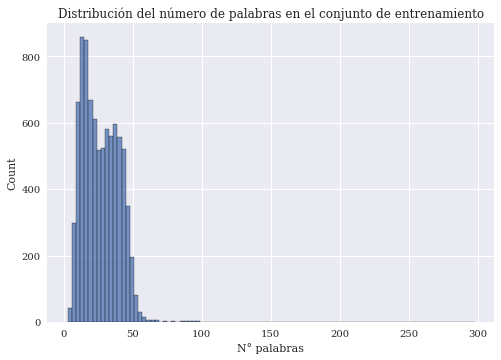

Nubes de palabras del conjunto de entrenamiento
lowercase
clean_hashtag
clean_et
lowercase
clean_hashtag
clean_et


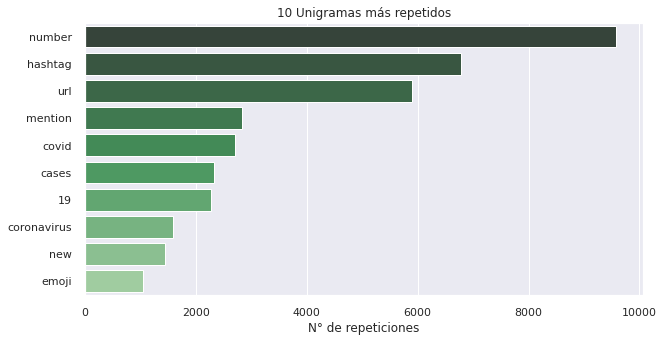

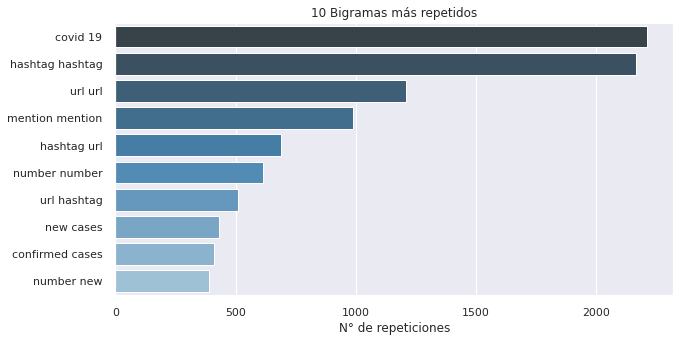

<Figure size 720x360 with 0 Axes>

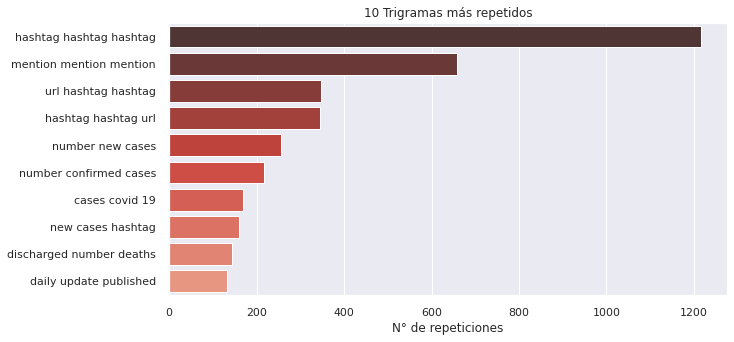

<Figure size 720x360 with 0 Axes>

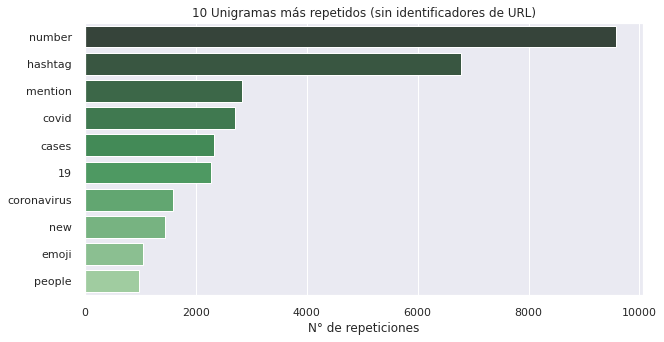

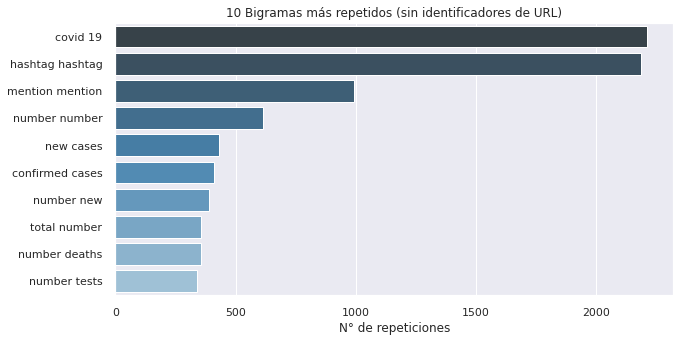

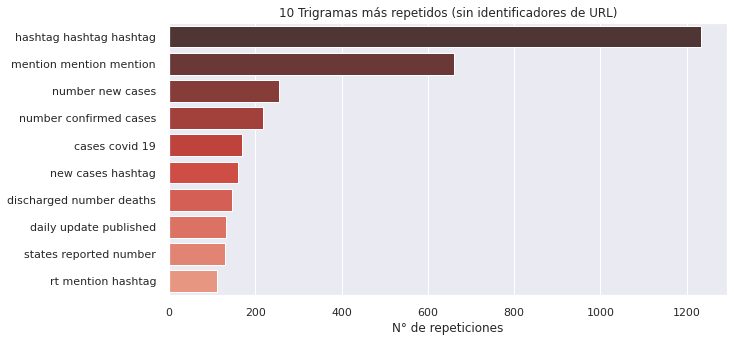

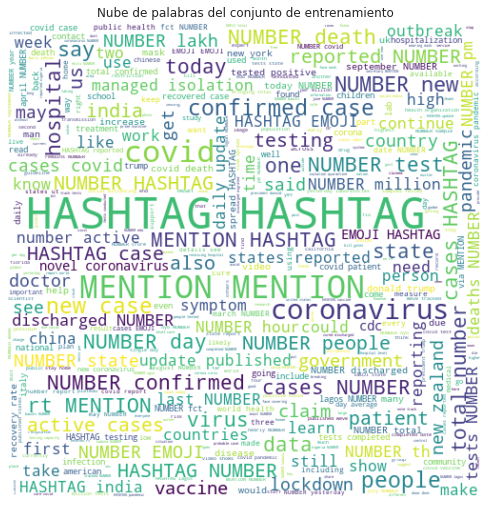

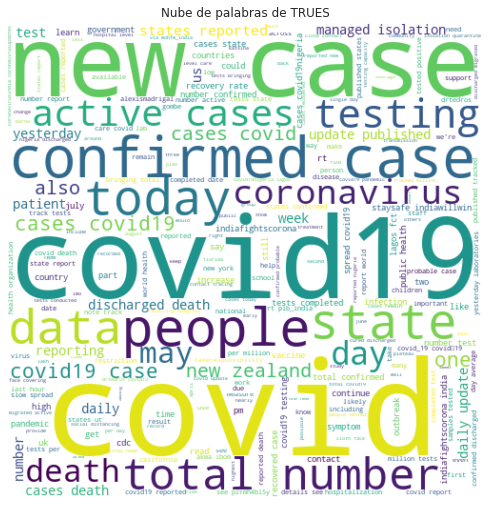

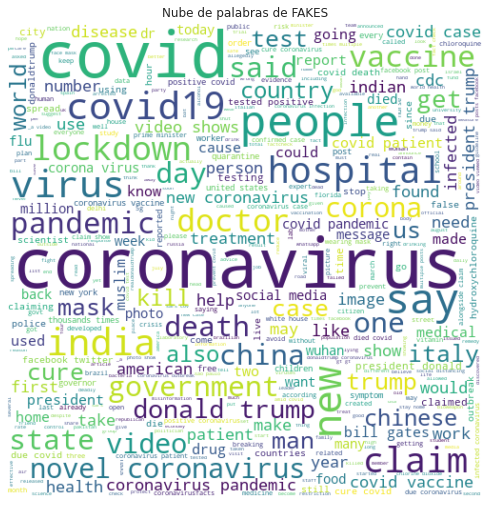

In [8]:
EDAIngles()

## Definicion del modelo



In [ ]:
def DigitalEpidemologyV2(regularization, optimizer):
  # Cargo el modelo en concreto y el tokenizador
  MODEL = "digitalepidemiologylab/covid-twitter-bert-v2"
  tokenizer, roberta_model = getTokenizerAndModel(MODEL, model_normalization=False, from_pt = False, regularization=regularization)
  # Revisar: Añado las palabras?
  # addPalabras()

  # Preproceso el texto de la mejor manera posible para este modelo
  # Basandome en las recomendaciones de los autores y pruebas realizadas.
  df_train, df_test = cargarDatasetIngles()
  train_texts, train_labels, test_texts, test_labels = getTextsLabelsIngles(df_train, df_test)

  pp.set_options(pp.OPT.URL)
  train_texts = preprocess(train_texts, lowercase=True, python_tokenize=True, demojize=True, clean_hashtag=False, cardiff=False, remove_emojis=False)
  test_texts  = preprocess(test_texts, lowercase=True, python_tokenize=True, demojize=True, clean_hashtag=False, cardiff=False, remove_emojis=False)

  train_encodings = tokenizer(train_texts, truncation=True, padding=True)
  test_encodings = tokenizer(test_texts, truncation=True, padding=True)

  sentence_length = 110
  train_input_ids,train_attention_masks = bert_encode(tokenizer,train_texts,sentence_length)
  test_input_ids,test_attention_masks = bert_encode(tokenizer,test_texts,sentence_length)

  # Creo el modelo y congelo las capas ocultas
  model_name = "DigitalEpidemologyV2"
  lr = 2e-5
  epsilon = 1e-8
  # optimizer = tf.keras.optimizers.Adamax
  loss = "binary_crossentropy"

  model = create_model_bert(roberta_model, model_name, lr, epsilon, optimizer, loss,sentence_length)
  # Saco una imagen
  tf.keras.utils.plot_model(model)
  # freezeLayers(model)

  # Lo entreno
  early_stopping_monitor = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='auto', min_delta=1e-5, patience=5, restore_best_weights=True)
  history = trainModel(model,train_input_ids, train_attention_masks, train_labels, validation_split=0.2, epochs=20, batch_size=16, callbacks=[early_stopping_monitor])

  # Obtengo métricas y gráficas
  mostrarEvolucion(history)

  pred = getCompleteReportIngles(model, df_test,test_input_ids, test_attention_masks)

  return model


def CardiffNLP(regularization, optimizer):
  # Cargo el modelo en concreto y el tokenizador
  MODEL = "cardiffnlp/twitter-roberta-base-mar2022"
  tokenizer, roberta_model = getTokenizerAndModel(MODEL, model_normalization=False, from_pt = True, regularization=regularization)
  # Revisar: Añado las palabras?
  # addPalabras()

  # Preproceso el texto de la mejor manera posible para este modelo
  # Basandome en las recomendaciones de los autores y pruebas realizadas.
  df_train, df_test = cargarDatasetIngles()
  train_texts, train_labels, test_texts, test_labels = getTextsLabelsIngles(df_train, df_test)

  train_texts = preprocess(train_texts, lowercase=False, python_tokenize=False, demojize=False, clean_hashtag=False, cardiff=True, remove_emojis=False)
  test_texts  = preprocess(test_texts, lowercase=False, python_tokenize=False, demojize=False, clean_hashtag=False, cardiff=True, remove_emojis=False)

  train_encodings = tokenizer(train_texts, truncation=True, padding=True)
  test_encodings = tokenizer(test_texts, truncation=True, padding=True)

  sentence_length = 110
  train_input_ids,train_attention_masks = bert_encode(tokenizer,train_texts,sentence_length)
  test_input_ids,test_attention_masks = bert_encode(tokenizer,test_texts,sentence_length)

  # Creo el modelo y congelo las capas ocultas
  model_name = "CardiffNLP"
  lr = 2e-5
  epsilon = 1e-8
  # optimizer = tf.keras.optimizers.Adamax
  loss = "binary_crossentropy"

  model = create_model_roberta(roberta_model, model_name, lr, epsilon, optimizer, loss,sentence_length)
  # Saco una imagen
  tf.keras.utils.plot_model(model)
  # freezeLayers(model)

  # Lo entreno
  early_stopping_monitor = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='auto', min_delta=1e-5, patience=5, restore_best_weights=True)
  history = trainModel(model,train_input_ids, train_attention_masks, train_labels, validation_split=0.2, epochs=20, batch_size=16, callbacks=[early_stopping_monitor])

  # Obtengo métricas y gráficas
  mostrarEvolucion(history)

  pred = getCompleteReportIngles(model, df_test,test_input_ids, test_attention_masks)

  return model


def Vinai(regularization, optimizer):
  # Cargo el modelo en concreto y el tokenizador
  MODEL = "vinai/bertweet-covid19-base-cased"
  tokenizer, roberta_model = getTokenizerAndModel(MODEL, model_normalization=True, from_pt = False,regularization=regularization)

  # Preproceso el texto de la mejor manera posible para este modelo
  # Basandome en las recomendaciones de los autores y pruebas realizadas.
  df_train, df_test = cargarDatasetIngles()
  train_texts, train_labels, test_texts, test_labels = getTextsLabelsIngles(df_train, df_test)

  train_texts = preprocess(train_texts, lowercase=False, python_tokenize=False, demojize=False, clean_hashtag=False, cardiff=False, remove_emojis=False)
  test_texts  = preprocess(test_texts, lowercase=False, python_tokenize=False, demojize=False, clean_hashtag=False, cardiff=False, remove_emojis=False)

  train_encodings = tokenizer(train_texts, truncation=True, padding=True)
  test_encodings = tokenizer(test_texts, truncation=True, padding=True)

  sentence_length = 110
  train_input_ids,train_attention_masks = bert_encode(tokenizer,train_texts,sentence_length)
  test_input_ids,test_attention_masks = bert_encode(tokenizer,test_texts,sentence_length)

  # Creo el modelo y congelo las capas ocultas
  model_name = "Vinai"
  lr = 2e-5
  epsilon = 1e-8
  # optimizer = tf.keras.optimizers.Adam
  loss = "binary_crossentropy"

  model = create_model_roberta(roberta_model, model_name, lr, epsilon, optimizer, loss,sentence_length)
  # Saco una imagen
  tf.keras.utils.plot_model(model)
  # freezeLayers(model)

  # Lo entreno
  early_stopping_monitor = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='auto', min_delta=1e-5, patience=5, restore_best_weights=True)
  history = trainModel(model,train_input_ids, train_attention_masks, train_labels, validation_split=0.2, epochs=20, batch_size=16, callbacks=[early_stopping_monitor])

  # Obtengo métricas y gráficas
  mostrarEvolucion(history)

  pred = getCompleteReportIngles(model, df_test, test_input_ids, test_attention_masks)

  return model



def SciBERT(regularization, optimizer):
  # Cargo el modelo en concreto y el tokenizador
  MODEL = "allenai/scibert_scivocab_uncased"
  tokenizer, roberta_model = getTokenizerAndModel(MODEL, model_normalization=False, from_pt = True,regularization=regularization)

  # Preproceso el texto de la mejor manera posible para este modelo
  # Basandome en las recomendaciones de los autores y pruebas realizadas.
  df_train, df_test = cargarDatasetIngles()
  train_texts, train_labels, test_texts, test_labels = getTextsLabelsIngles(df_train, df_test)

  pp.set_options(pp.OPT.URL)
  train_texts = preprocess(train_texts, lowercase=True, python_tokenize=True, demojize=True, clean_hashtag=False, cardiff=False, remove_emojis=False)
  test_texts  = preprocess(test_texts, lowercase=True, python_tokenize=True, demojize=True, clean_hashtag=False, cardiff=False, remove_emojis=False)

  train_encodings = tokenizer(train_texts, truncation=True, padding=True)
  test_encodings = tokenizer(test_texts, truncation=True, padding=True)

  sentence_length = 110
  train_input_ids,train_attention_masks = bert_encode(tokenizer,train_texts,sentence_length)
  test_input_ids,test_attention_masks = bert_encode(tokenizer,test_texts,sentence_length)

  # Creo el modelo y congelo las capas ocultas
  model_name = "SciBERT"
  lr = 2e-5
  epsilon = 1e-8
  # optimizer = tf.keras.optimizers.Adam
  loss = "binary_crossentropy"

  model = create_model_bert(roberta_model, model_name, lr, epsilon, optimizer, loss,sentence_length)
  # Saco una imagen
  tf.keras.utils.plot_model(model)
  # freezeLayers(model)

  # Lo entreno
  early_stopping_monitor = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='auto', min_delta=1e-5, patience=5, restore_best_weights=True)
  history = trainModel(model,train_input_ids, train_attention_masks, train_labels, validation_split=0.2, epochs=20, batch_size=16, callbacks=[early_stopping_monitor])

  # Obtengo métricas y gráficas
  mostrarEvolucion(history)

  pred = getCompleteReportIngles(model, df_test, test_input_ids, test_attention_masks)

  return model

def BaselinesIngles():
  def warn(*args, **kwargs):
    pass
  import warnings
  warnings.warn = warn
  warnings.filterwarnings("ignore", category=DeprecationWarning) 


  train_texts, train_labels, test_texts, test_labels = getTextsLabelsIngles(df_train, df_test)

  train_texts = [cleantext(x) for x in train_texts]
  test_texts = [cleantext(x) for x in test_texts]

  print("\n")
  print("-------------      Linear SVC       -------------")

  pipeline = Pipeline([
        ('count', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('model', LinearSVC(random_state=0))
    ])
  history = pipeline.fit(train_texts,train_labels)

  pred = getCompleteReportScikitIngles(pipeline, "Linear SVC",test_texts)

  print("\n")
  print("-------------      Logistic Regression       -------------")

  pipeline = Pipeline([
        ('count', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('model', LogisticRegression(random_state=0))
    ])
  history = pipeline.fit(train_texts,train_labels)

  pred = getCompleteReportScikitIngles(pipeline, "Logistic Regression",test_texts)

  print("\n")
  print("-------------      Decision Tree Classifier       -------------")

  pipeline = Pipeline([
        ('count', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('model', DecisionTreeClassifier(random_state=0,max_depth=10))
    ])
  history = pipeline.fit(train_texts,train_labels)

  pred = getCompleteReportScikitIngles(pipeline, "Decision Tree Classifier",test_texts)

  # fig, ax = plt.subplots(figsize=(45,25))
  # plot_tree(pipeline['model'], max_depth=10, ax = ax, fontsize=10, 
  #           feature_names=pipeline['count'].get_feature_names(),
  #           class_names=["true","fake"])


  print("\n")
  print("-------------      GradientBoost Classifier       -------------")

  pipeline = Pipeline([
        ('count', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('model', GradientBoostingClassifier(random_state=0))
    ])
  history = pipeline.fit(train_texts,train_labels)

  pred = getCompleteReportScikitIngles(pipeline, "Gradient Boost Classifier",test_texts)



### Baselines



-------------      Linear SVC       -------------
------------- Classification Report -------------
              precision    recall  f1-score   support

           0    0.94404   0.93393   0.93896      1120
           1    0.92829   0.93922   0.93372      1020

    accuracy                        0.93645      2140
   macro avg    0.93617   0.93657   0.93634      2140
weighted avg    0.93654   0.93645   0.93646      2140



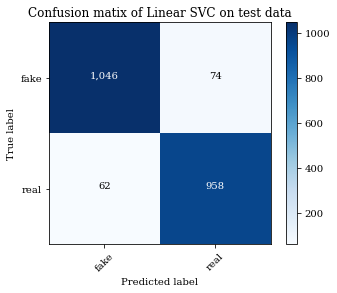



-------------      Logistic Regression       -------------
------------- Classification Report -------------
              precision    recall  f1-score   support

           0    0.94096   0.91071   0.92559      1120
           1    0.90530   0.93725   0.92100      1020

    accuracy                        0.92336      2140
   macro avg    0.92313   0.92398   0.92330      2140
weighted avg    0.92396   0.92336   0.92340      2140



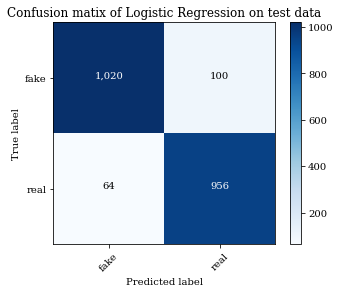



-------------      Decision Tree Classifier       -------------
------------- Classification Report -------------
              precision    recall  f1-score   support

           0    0.90721   0.74196   0.81631      1120
           1    0.76389   0.91667   0.83333      1020

    accuracy                        0.82523      2140
   macro avg    0.83555   0.82932   0.82482      2140
weighted avg    0.83890   0.82523   0.82442      2140



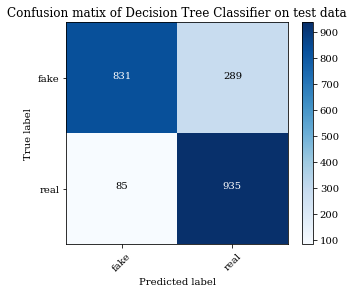



-------------      GradientBoost Classifier       -------------
------------- Classification Report -------------
              precision    recall  f1-score   support

           0    0.90909   0.83929   0.87279      1120
           1    0.83725   0.90784   0.87112      1020

    accuracy                        0.87196      2140
   macro avg    0.87317   0.87356   0.87196      2140
weighted avg    0.87485   0.87196   0.87200      2140



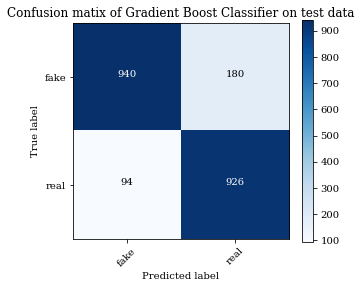

In [ ]:
BaselinesIngles()

### DigitalEpidomology


Some layers from the model checkpoint at digitalepidemiologylab/covid-twitter-bert-v2 were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at digitalepidemiologylab/covid-twitter-bert-v2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


lowercase
python_tokenize
demojize
clean_et
lowercase
python_tokenize
demojize


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


clean_et


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2307: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Epoch 1/20
428/428 [==============================] - 306s 671ms/step - loss: 0.3083 - accuracy: 0.8708 - val_loss: 0.1825 - val_accuracy: 0.9276
Epoch 2/20
428/428 [==============================] - 282s 658ms/step - loss: 0.1851 - accuracy: 0.9213 - val_loss: 0.1100 - val_accuracy: 0.9539
Epoch 3/20
428/428 [==============================] - 282s 658ms/step - loss: 0.1046 - accuracy: 0.9575 - val_loss: 0.0808 - val_accuracy: 0.9708
Epoch 4/20
428/428 [==============================] - 281s 656ms/step - loss: 0.0491 - accuracy: 0.9828 - val_loss: 0.0884 - val_accuracy: 0.9685
Epoch 5/20
428/428 [==============================] - 281s 657ms/step - loss: 0.0278 - accuracy: 0.9892 - val_loss: 0.0749 - val_accuracy: 0.9813
Epoch 6/20
428/428 [==============================] - 281s 657ms/step - loss: 0.0264 - accuracy: 0.9909 - val_loss: 0.0716 - val_accuracy: 0.9778
Epoch 7/20
428/428 [==============================] - 280s 655ms/step - loss: 0.6358 - accuracy: 0.5704 - val_loss: 0.6555 -

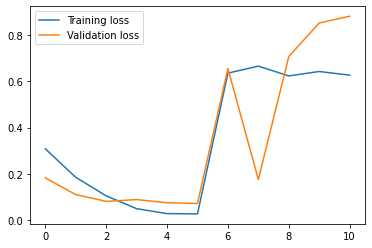

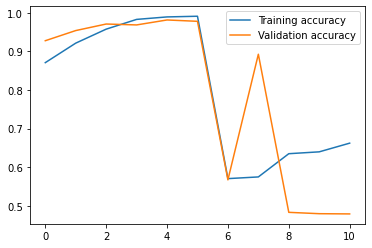

67/67 [==============================] - 32s 405ms/step
------------- Classification Report -------------
              precision    recall  f1-score   support

           0    0.97285   0.99196   0.98232      1120
           1    0.99098   0.96961   0.98018      1020

    accuracy                        0.98131      2140
   macro avg    0.98192   0.98079   0.98125      2140
weighted avg    0.98149   0.98131   0.98130      2140



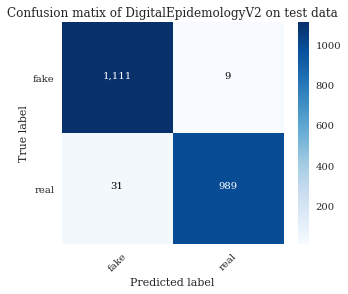

In [ ]:
model = DigitalEpidemologyV2(regularization=True, optimizer=Adam)

In [ ]:
pickle.dump(model,open("/content/drive/MyDrive/Colab Notebooks/V2_Adamax.pkl","wb"))

### CardiffNLP

In [ ]:
model = pickle.load(open("/content/drive/MyDrive/Colab Notebooks/Cardiff_Adam.pkl","rb"))

In [ ]:
MODEL = "cardiffnlp/twitter-roberta-base-mar2022"
tokenizer, roberta_model = getTokenizerAndModel(MODEL, model_normalization=False, from_pt = True, regularization=False) #Hey
# Revisar: Añado las palabras?
# addPalabras()

# Preproceso el texto de la mejor manera posible para este modelo
# Basandome en las recomendaciones de los autores y pruebas realizadas.
df_train, df_test = cargarDatasetIngles()
train_texts, train_labels, test_texts, test_labels = getTextsLabelsIngles(df_train, df_test)

train_texts = preprocess(train_texts, lowercase=False, python_tokenize=False, demojize=False, clean_hashtag=False, cardiff=True, remove_emojis=False)
test_texts  = preprocess(test_texts, lowercase=False, python_tokenize=False, demojize=False, clean_hashtag=False, cardiff=True, remove_emojis=False)

train_encodings = tokenizer(train_texts, truncation=True, padding=True)
test_encodings = tokenizer(test_texts, truncation=True, padding=True)

sentence_length = 110
train_input_ids,train_attention_masks = bert_encode(tokenizer,train_texts,sentence_length)
test_input_ids,test_attention_masks = bert_encode(tokenizer,test_texts,sentence_length)

Downloading:   0%|          | 0.00/346 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/780k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/725 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/476M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['roberta.embeddings.position_ids', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

cardiff
clean_et
cardiff
clean_et


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2307: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


67/67 [==============================] - 17s 219ms/step
------------- Classification Report -------------
              precision    recall  f1-score   support

           0    0.97278   0.98929   0.98097      1120
           1    0.98801   0.96961   0.97872      1020

    accuracy                        0.97991      2140
   macro avg    0.98040   0.97945   0.97984      2140
weighted avg    0.98004   0.97991   0.97990      2140



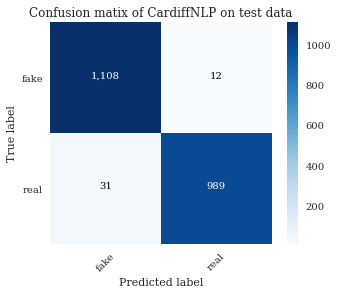

In [ ]:
pred = getCompleteReportIngles(model, df_test, test_input_ids, test_attention_masks)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['roberta.embeddings.position_ids', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

cardiff
clean_et
cardiff
clean_et


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2307: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Epoch 1/20
428/428 [==============================] - 179s 396ms/step - loss: 0.1522 - accuracy: 0.9378 - val_loss: 0.0928 - val_accuracy: 0.9667
Epoch 2/20
428/428 [==============================] - 167s 390ms/step - loss: 0.0492 - accuracy: 0.9826 - val_loss: 0.1070 - val_accuracy: 0.9679
Epoch 3/20
428/428 [==============================] - 167s 390ms/step - loss: 0.0216 - accuracy: 0.9933 - val_loss: 0.1136 - val_accuracy: 0.9731
Epoch 4/20
428/428 [==============================] - 167s 390ms/step - loss: 0.0133 - accuracy: 0.9961 - val_loss: 0.0934 - val_accuracy: 0.9784
Epoch 5/20
428/428 [==============================] - 167s 391ms/step - loss: 0.0187 - accuracy: 0.9943 - val_loss: 0.0815 - val_accuracy: 0.9766
Epoch 6/20
428/428 [==============================] - 167s 390ms/step - loss: 0.0093 - accuracy: 0.9968 - val_loss: 0.1556 - val_accuracy: 0.9644
Epoch 7/20
428/428 [==============================] - 167s 390ms/step - loss: 0.0089 - accuracy: 0.9962 - val_loss: 0.1101 -

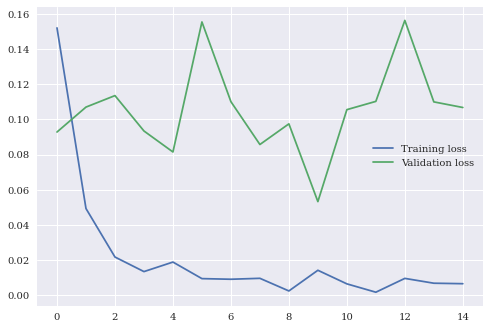

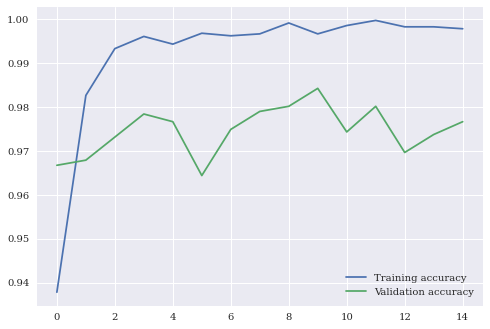

67/67 [==============================] - 18s 226ms/step
------------- Classification Report -------------
              precision    recall  f1-score   support

           0    0.97438   0.98482   0.97957      1120
           1    0.98313   0.97157   0.97732      1020

    accuracy                        0.97850      2140
   macro avg    0.97876   0.97820   0.97845      2140
weighted avg    0.97855   0.97850   0.97850      2140



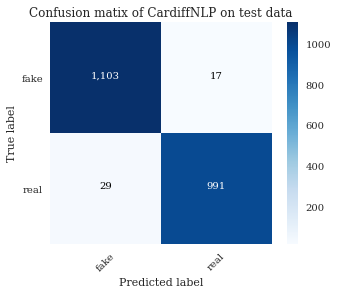

In [ ]:
model = CardiffNLP(regularization=False,optimizer=Adam)

In [ ]:
pickle.dump(model,open("/content/drive/MyDrive/Colab Notebooks/Cardiff_Adamax_Regularization.pkl","wb"))

### Vinai

In [ ]:
model = Vinai(regularization=True,optimizer=Adamax)

### COVID-SciBERT

Downloading:   0%|          | 0.00/385 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/223k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/422M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint

lowercase
python_tokenize
demojize
clean_et
lowercase
python_tokenize
demojize


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


clean_et


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2307: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Epoch 1/20
428/428 [==============================] - 184s 406ms/step - loss: 0.2449 - accuracy: 0.8960 - val_loss: 0.2243 - val_accuracy: 0.9264
Epoch 2/20
428/428 [==============================] - 172s 403ms/step - loss: 0.1135 - accuracy: 0.9587 - val_loss: 0.0852 - val_accuracy: 0.9661
Epoch 3/20
428/428 [==============================] - 173s 404ms/step - loss: 0.0707 - accuracy: 0.9739 - val_loss: 0.0836 - val_accuracy: 0.9731
Epoch 4/20
428/428 [==============================] - 172s 403ms/step - loss: 0.0520 - accuracy: 0.9825 - val_loss: 0.1147 - val_accuracy: 0.9644
Epoch 5/20
428/428 [==============================] - 173s 404ms/step - loss: 0.0411 - accuracy: 0.9866 - val_loss: 0.0642 - val_accuracy: 0.9778
Epoch 6/20
428/428 [==============================] - 172s 402ms/step - loss: 0.0243 - accuracy: 0.9914 - val_loss: 0.1004 - val_accuracy: 0.9708
Epoch 7/20
428/428 [==============================] - 172s 403ms/step - loss: 0.0248 - accuracy: 0.9912 - val_loss: 0.1250 -

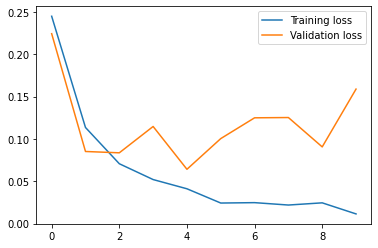

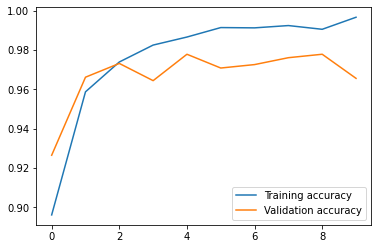

67/67 [==============================] - 19s 243ms/step
------------- Classification Report -------------
              precision    recall  f1-score   support

           0    0.97004   0.98304   0.97650      1120
           1    0.98109   0.96667   0.97383      1020

    accuracy                        0.97523      2140
   macro avg    0.97557   0.97485   0.97516      2140
weighted avg    0.97531   0.97523   0.97522      2140



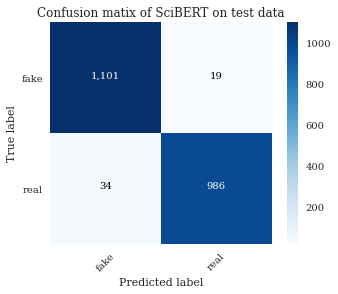

In [ ]:
model = SciBERT(regularization=True, optimizer=Adam)

In [ ]:
pickle.dump(model,open("/content/drive/MyDrive/Colab Notebooks/SciBERT_Adamax_Regularization.pkl","wb"))

# Dataset en Español

## Análisis Exploratorio de los Datos

In [9]:
df_train, df_test = cargarDatasetMexico()
train_texts, train_labels, test_texts, test_labels = getTextsLabelsMexico(df_train, df_test)

In [10]:
train_texts = preprocess(train_texts, lowercase=False, python_tokenize=False, demojize=False, clean_hashtag=False, cardiff=False, remove_emojis=False)
test_texts  = preprocess(test_texts, lowercase=False, python_tokenize=False, demojize=False, clean_hashtag=False, cardiff=False, remove_emojis=False)

clean_et
clean_et


Tamaño total del conjunto de datos: 1248
N° de palabras del conjunto de entrenamiento: 68616
Tamaño del conjunto de datos de entrenamiento: 676
Tamaño del conjunto de datos de test: 572
Media del número de palabras: 210.47852760736197
Mediana del número de palabras: 221.5
Máximo del número de palabras: 303
Gráfica con la distribución del número de palabras en el conjunto de entrenamiento:


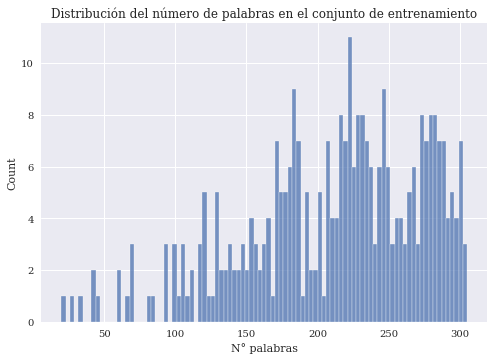

Nubes de palabras del conjunto de entrenamiento
clean_et
clean_et


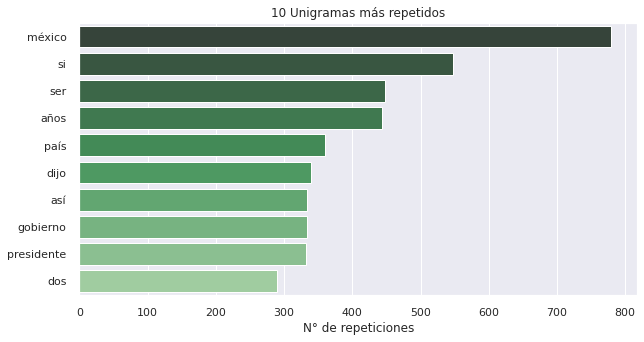

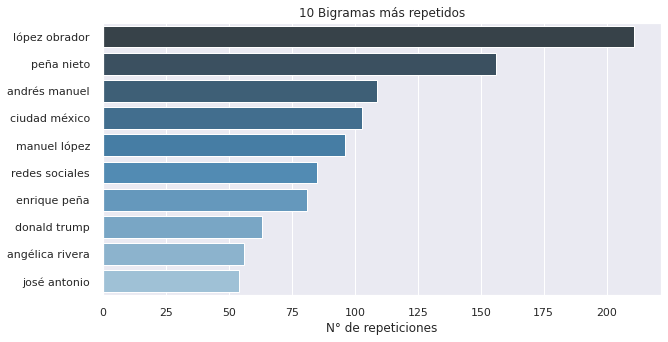

<Figure size 720x360 with 0 Axes>

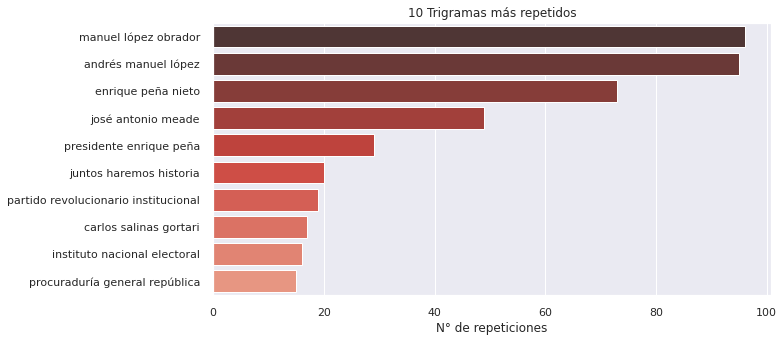

<Figure size 720x360 with 0 Axes>

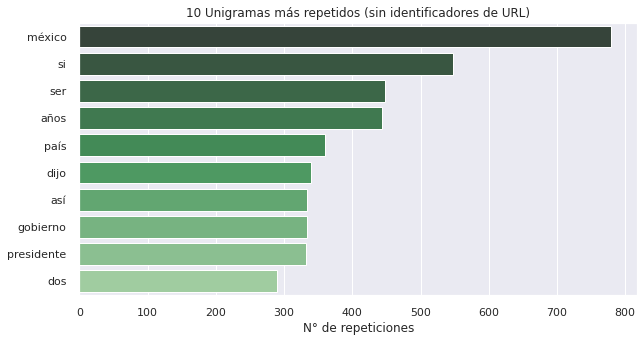

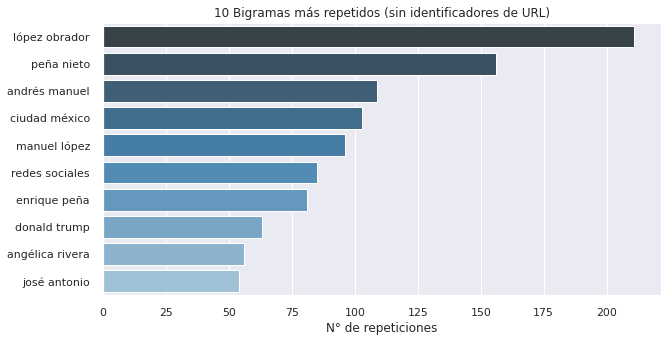

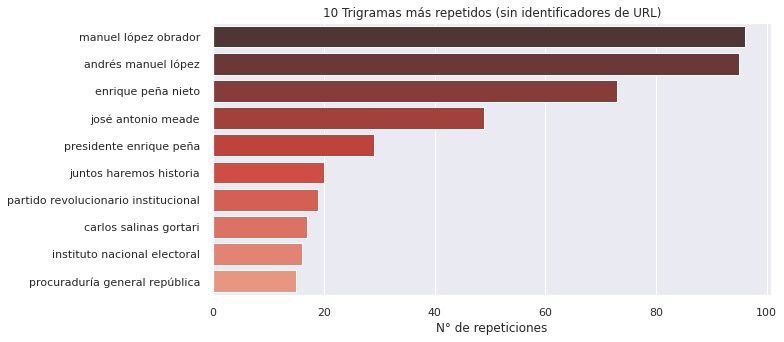

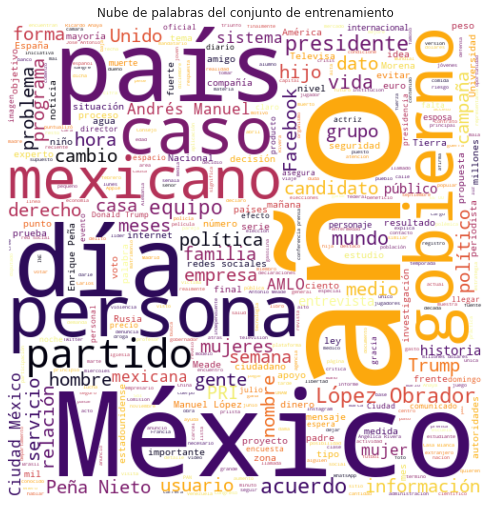

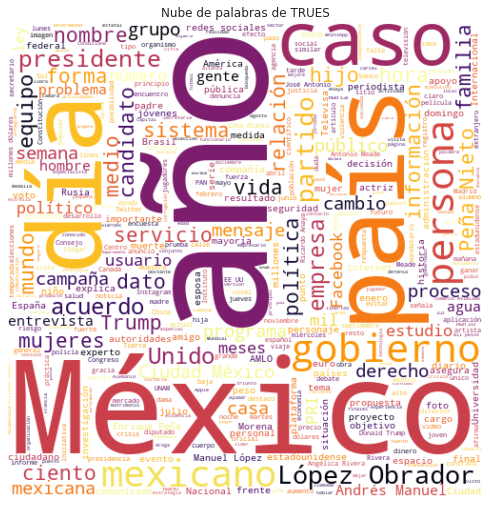

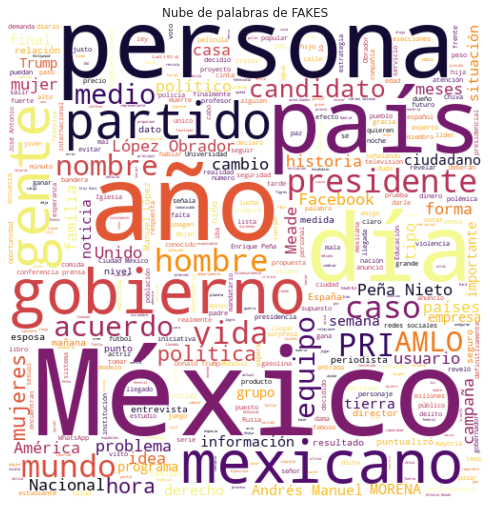

In [11]:
EDAMexico()

## Definición del Modelo

In [ ]:
def BaselinesMexico():
  def warn(*args, **kwargs):
    pass
  import warnings
  warnings.warn = warn
  warnings.filterwarnings("ignore", category=DeprecationWarning) 

  df_train, df_test = cargarDatasetMexico()
  train_texts, train_labels, test_texts, test_labels = getTextsLabelsMexico(df_train, df_test)

  train_texts = [cleantext(x,"ES") for x in train_texts]
  test_texts = [cleantext(x,"ES") for x in test_texts]

  print("\n")
  print("-------------      Linear SVC       -------------")

  pipeline = Pipeline([
        ('count', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('model', LinearSVC(random_state=0))
    ])
  history = pipeline.fit(train_texts,train_labels)

  pred = getCompleteReportScikitMexico(pipeline, "Linear SVC",test_texts)

  print("\n")
  print("-------------      Logistic Regression       -------------")

  pipeline = Pipeline([
        ('count', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('model', LogisticRegression(random_state=0))
    ])
  history = pipeline.fit(train_texts,train_labels)

  pred = getCompleteReportScikitMexico(pipeline, "Logistic Regression",test_texts)

  print("\n")
  print("-------------      Decision Tree Classifier       -------------")

  pipeline = Pipeline([
        ('count', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('model', DecisionTreeClassifier(random_state=0,max_depth=10))
    ])
  history = pipeline.fit(train_texts,train_labels)

  pred = getCompleteReportScikitMexico(pipeline, "Decision Tree Classifier",test_texts)

  # fig, ax = plt.subplots(figsize=(45,25))
  # plot_tree(pipeline['model'], max_depth=10, ax = ax, fontsize=10, 
  #           feature_names=pipeline['count'].get_feature_names(),
  #           class_names=["true","fake"])


  print("\n")
  print("-------------      GradientBoost Classifier       -------------")

  pipeline = Pipeline([
        ('count', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('model', GradientBoostingClassifier(random_state=0))
    ])
  history = pipeline.fit(train_texts,train_labels)

  pred = getCompleteReportScikitMexico(pipeline, "Gradient Boost Classifier",test_texts)

def RobertaGOB(regularization, optimizer):
  # Cargo el modelo en concreto y el tokenizador
  MODEL = "PlanTL-GOB-ES/roberta-large-bne"
  tokenizer, roberta_model = getTokenizerAndModel(MODEL, model_normalization=False, from_pt = True, regularization=regularization)
  # Revisar: Añado las palabras?
  # Creo que debería
  # addPalabras()


  # Preproceso el texto de la mejor manera posible para este modelo
  # Basandome en las recomendaciones de los autores y pruebas realizadas.
  df_train, df_test = cargarDatasetMexico()
  train_texts, train_labels, test_texts, test_labels = getTextsLabelsMexico(df_train, df_test)

  train_texts = preprocess(train_texts, lowercase=False, python_tokenize=False, demojize=False, clean_hashtag=False, cardiff=False, remove_emojis=False)
  test_texts  = preprocess(test_texts, lowercase=False, python_tokenize=False, demojize=False, clean_hashtag=False, cardiff=False, remove_emojis=False)

  train_encodings = tokenizer(train_texts, truncation=True, padding=True)
  test_encodings = tokenizer(test_texts, truncation=True, padding=True)

  sentence_length = 310
  train_input_ids,train_attention_masks = bert_encode(tokenizer,train_texts,sentence_length)
  test_input_ids,test_attention_masks = bert_encode(tokenizer,test_texts,sentence_length)

  # Creo el modelo y congelo las capas ocultas
  model_name = "PlanTL-GOB-ES"
  lr = 2e-5
  epsilon = 1e-8
  # optimizer = tf.keras.optimizers.Adamax
  loss = "binary_crossentropy"

  model = create_model_roberta(roberta_model, model_name, lr, epsilon, optimizer, loss,sentence_length)
  # Saco una imagen
  tf.keras.utils.plot_model(model)
  # freezeLayers(model)

  # Lo entreno
  early_stopping_monitor = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='auto', min_delta=1e-5, patience=5, restore_best_weights=True)
  history = trainModel(model,train_input_ids, train_attention_masks, train_labels, validation_split=0.2, epochs=20, batch_size=4, callbacks=[early_stopping_monitor])

  # Obtengo métricas y gráficas
  mostrarEvolucion(history)

  pred = getCompleteReportMexico(model, df_test, test_input_ids, test_attention_masks)

  return model



def BIOGOB(regularization,optimizer):
  # Cargo el modelo en concreto y el tokenizador
  MODEL = "PlanTL-GOB-ES/bsc-bio-es"
  tokenizer, roberta_model = getTokenizerAndModel(MODEL, model_normalization=False, from_pt = True, regularization=regularization)
  # Revisar: Añado las palabras?
  # Creo que debería
  # addPalabras()

  # Preproceso el texto de la mejor manera posible para este modelo
  # Basandome en las recomendaciones de los autores y pruebas realizadas.
  df_train, df_test = cargarDatasetMexico()
  train_texts, train_labels, test_texts, test_labels = getTextsLabelsMexico(df_train, df_test)

  train_texts = preprocess(train_texts, lowercase=False, python_tokenize=False, demojize=False, clean_hashtag=False, cardiff=False, remove_emojis=False)
  test_texts  = preprocess(test_texts, lowercase=False, python_tokenize=False, demojize=False, clean_hashtag=False, cardiff=False, remove_emojis=False)

  train_encodings = tokenizer(train_texts, truncation=True, padding=True)
  test_encodings = tokenizer(test_texts, truncation=True, padding=True)

  sentence_length = 310
  train_input_ids,train_attention_masks = bert_encode(tokenizer,train_texts,sentence_length)
  test_input_ids,test_attention_masks = bert_encode(tokenizer,test_texts,sentence_length)

  # Creo el modelo y congelo las capas ocultas
  model_name = "BIO-GOB"
  lr = 2e-5
  epsilon = 1e-8
  # optimizer = tf.keras.optimizers.Adamax
  loss = "binary_crossentropy"

  model = create_model_roberta(roberta_model, model_name, lr, epsilon, optimizer, loss,sentence_length)
  # Saco una imagen
  tf.keras.utils.plot_model(model)
  # freezeLayers(model)

  # Lo entreno
  early_stopping_monitor = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='auto', min_delta=1e-5, patience=5, restore_best_weights=True)
  history = trainModel(model,train_input_ids, train_attention_masks, train_labels, validation_split=0.2, epochs=20, batch_size=4, callbacks=[early_stopping_monitor])

  # Obtengo métricas y gráficas
  mostrarEvolucion(history)

  pred = getCompleteReportMexico(model, df_test, test_input_ids, test_attention_masks)

  return model


def BETO(regularization,optimizer):
  # Cargo el modelo en concreto y el tokenizador
  MODEL = "dccuchile/bert-base-spanish-wwm-uncased"
  tokenizer, roberta_model = getTokenizerAndModel(MODEL, model_normalization=False, from_pt = True, regularization=regularization)
  # Revisar: Añado las palabras?
  # Creo que debería
  # addPalabras()

  # Preproceso el texto de la mejor manera posible para este modelo
  # Basandome en las recomendaciones de los autores y pruebas realizadas.
  df_train, df_test = cargarDatasetMexico()
  train_texts, train_labels, test_texts, test_labels = getTextsLabelsMexico(df_train, df_test)

  train_texts = preprocess(train_texts, lowercase=True, python_tokenize=False, demojize=False, clean_hashtag=False, cardiff=False, remove_emojis=False)
  test_texts  = preprocess(test_texts, lowercase=True, python_tokenize=False, demojize=False, clean_hashtag=False, cardiff=False, remove_emojis=False)

  train_encodings = tokenizer(train_texts, truncation=True, padding=True)
  test_encodings = tokenizer(test_texts, truncation=True, padding=True)

  sentence_length = 310
  train_input_ids,train_attention_masks = bert_encode(tokenizer,train_texts,sentence_length)
  test_input_ids,test_attention_masks = bert_encode(tokenizer,test_texts,sentence_length)

  # Creo el modelo y congelo las capas ocultas
  model_name = "BIO-GOB"
  lr = 2e-5
  epsilon = 1e-8
  optimizer = tf.keras.optimizers.Adamax
  loss = "binary_crossentropy"

  model = create_model_roberta(roberta_model, model_name, lr, epsilon, optimizer, loss,sentence_length)
  # Saco una imagen
  tf.keras.utils.plot_model(model)
  # freezeLayers(model)

  # Lo entreno
  early_stopping_monitor = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='auto', min_delta=1e-5, patience=3, restore_best_weights=True)
  history = trainModel(model,train_input_ids, train_attention_masks, train_labels, validation_split=0.2, epochs=30, batch_size=4, callbacks=[early_stopping_monitor])

  # Obtengo métricas y gráficas
  mostrarEvolucion(history)

  pred = getCompleteReportMexico(model, df_test, test_input_ids, test_attention_masks)

  return model



def Narrativa(regularization,optimizer):
  # Cargo el modelo en concreto y el tokenizador
  MODEL = "Narrativaai/fake-news-detection-spanish"
  tokenizer, roberta_model = getTokenizerAndModel(MODEL, model_normalization=False, from_pt = True, regularization=regularization)
  # Revisar: Añado las palabras?
  # Creo que debería
  # addPalabras()

  # Preproceso el texto de la mejor manera posible para este modelo
  # Basandome en las recomendaciones de los autores y pruebas realizadas.
  df_train, df_test = cargarDatasetMexico()
  train_texts, train_labels, test_texts, test_labels = getTextsLabelsMexico(df_train, df_test)

  train_texts = preprocess(train_texts, lowercase=False, python_tokenize=False, demojize=False, clean_hashtag=False, cardiff=False, remove_emojis=False)
  test_texts  = preprocess(test_texts, lowercase=False, python_tokenize=False, demojize=False, clean_hashtag=False, cardiff=False, remove_emojis=False)

  train_encodings = tokenizer(train_texts, truncation=True, padding=True)
  test_encodings = tokenizer(test_texts, truncation=True, padding=True)

  sentence_length = 310
  train_input_ids,train_attention_masks = bert_encode(tokenizer,train_texts,sentence_length)
  test_input_ids,test_attention_masks = bert_encode(tokenizer,test_texts,sentence_length)

  # Creo el modelo y congelo las capas ocultas
  model_name = "BIO-GOB"
  lr = 2e-5
  epsilon = 1e-8
  optimizer = tf.keras.optimizers.Adamax
  loss = "binary_crossentropy"

  model = create_model_roberta(roberta_model, model_name, lr, epsilon, optimizer, loss,sentence_length)
  # Saco una imagen
  tf.keras.utils.plot_model(model)
  # freezeLayers(model)

  # Lo entreno
  early_stopping_monitor = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='auto', min_delta=1e-5, patience=3, restore_best_weights=True)
  history = trainModel(model,train_input_ids, train_attention_masks, train_labels, validation_split=0.2, epochs=30, batch_size=4, callbacks=[early_stopping_monitor])

  # Obtengo métricas y gráficas
  mostrarEvolucion(history)

  pred = getCompleteReportMexico(model, df_test, test_input_ids, test_attention_masks)

  return model

### Baselines



-------------      Linear SVC       -------------
------------- Classification Report -------------
              precision    recall  f1-score   support

         0.0    0.63684   0.84615   0.72673       286
         1.0    0.77083   0.51748   0.61925       286

    accuracy                        0.68182       572
   macro avg    0.70384   0.68182   0.67299       572
weighted avg    0.70384   0.68182   0.67299       572



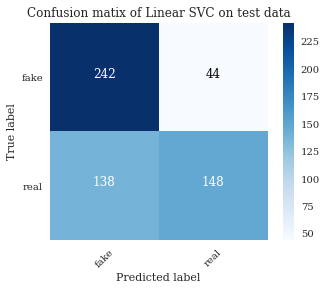



-------------      Logistic Regression       -------------
------------- Classification Report -------------
              precision    recall  f1-score   support

         0.0    0.64345   0.80769   0.71628       286
         1.0    0.74178   0.55245   0.63327       286

    accuracy                        0.68007       572
   macro avg    0.69262   0.68007   0.67477       572
weighted avg    0.69262   0.68007   0.67477       572



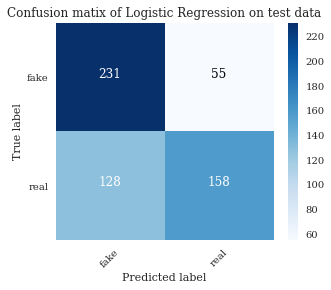



-------------      Decision Tree Classifier       -------------
------------- Classification Report -------------
              precision    recall  f1-score   support

         0.0    0.64103   0.52448   0.57692       286
         1.0    0.59763   0.70629   0.64744       286

    accuracy                        0.61538       572
   macro avg    0.61933   0.61538   0.61218       572
weighted avg    0.61933   0.61538   0.61218       572



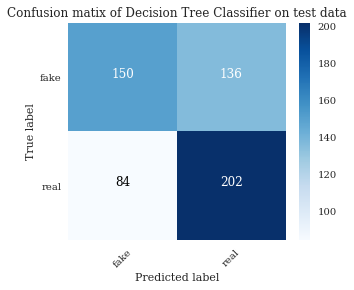



-------------      GradientBoost Classifier       -------------
------------- Classification Report -------------
              precision    recall  f1-score   support

         0.0    0.64407   0.79720   0.71250       286
         1.0    0.73394   0.55944   0.63492       286

    accuracy                        0.67832       572
   macro avg    0.68901   0.67832   0.67371       572
weighted avg    0.68901   0.67832   0.67371       572



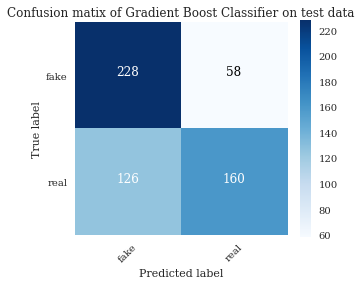

In [ ]:
BaselinesMexico()

### RobertaGOB

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.dense.weight', 'lm_head.decoder.bias', 'roberta.embeddings.position_ids', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream 

clean_et
clean_et
Epoch 1/20
135/135 [==============================] - 97s 584ms/step - loss: 0.4871 - accuracy: 0.7852 - val_loss: 0.7946 - val_accuracy: 0.6838
Epoch 2/20
135/135 [==============================] - 74s 546ms/step - loss: 0.3113 - accuracy: 0.8963 - val_loss: 0.3591 - val_accuracy: 0.8603
Epoch 3/20
135/135 [==============================] - 74s 546ms/step - loss: 0.1110 - accuracy: 0.9630 - val_loss: 0.3453 - val_accuracy: 0.8897
Epoch 4/20
135/135 [==============================] - 73s 539ms/step - loss: 0.1109 - accuracy: 0.9630 - val_loss: 0.6562 - val_accuracy: 0.7941
Epoch 5/20
135/135 [==============================] - 74s 546ms/step - loss: 0.0517 - accuracy: 0.9870 - val_loss: 0.3238 - val_accuracy: 0.8750
Epoch 6/20
135/135 [==============================] - 73s 538ms/step - loss: 8.6880e-04 - accuracy: 1.0000 - val_loss: 0.4045 - val_accuracy: 0.8897
Epoch 7/20
135/135 [==============================] - 73s 538ms/step - loss: 1.8422e-04 - accuracy: 1.0000 -

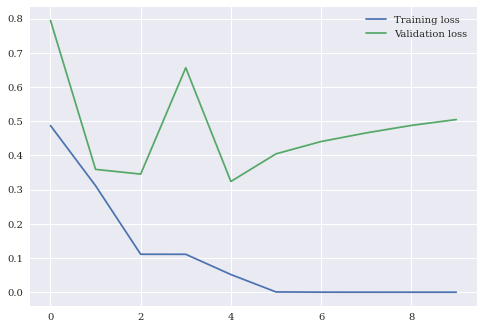

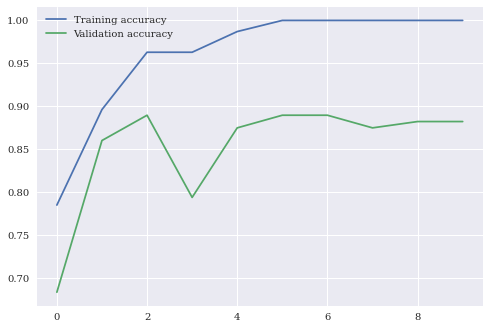

18/18 [==============================] - 27s 1s/step
------------- Classification Report -------------
              precision    recall  f1-score   support

         0.0    0.69903   0.75524   0.72605       286
         1.0    0.73384   0.67483   0.70310       286

    accuracy                        0.71503       572
   macro avg    0.71643   0.71503   0.71457       572
weighted avg    0.71643   0.71503   0.71457       572



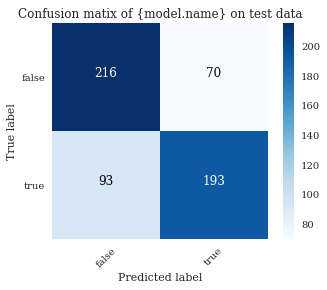

In [ ]:
model = RobertaGOB(regularization=False, optimizer=Adam)

### Roberta-Bio-GOB

In [ ]:
model = BIOGOB(regularization=True,optimizer=Adam)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.decoder.weight', 'lm_head.dense.bias', 'roberta.embeddings.position_ids', 'lm_head.decoder.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream 

clean_et
clean_et


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2291: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Epoch 1/20
135/135 [==============================] - 40s 214ms/step - loss: 0.6070 - accuracy: 0.6778 - val_loss: 0.6177 - val_accuracy: 0.6544
Epoch 2/20
135/135 [==============================] - 27s 198ms/step - loss: 0.4699 - accuracy: 0.7889 - val_loss: 0.4117 - val_accuracy: 0.8235
Epoch 3/20
135/135 [==============================] - 26s 195ms/step - loss: 0.3482 - accuracy: 0.8537 - val_loss: 0.6447 - val_accuracy: 0.6765
Epoch 4/20
135/135 [==============================] - 26s 195ms/step - loss: 0.2246 - accuracy: 0.9111 - val_loss: 0.5320 - val_accuracy: 0.7059
Epoch 5/20
135/135 [==============================] - 26s 195ms/step - loss: 0.1470 - accuracy: 0.9481 - val_loss: 0.4132 - val_accuracy: 0.8603
Epoch 6/20
135/135 [==============================] - 27s 198ms/step - loss: 0.0825 - accuracy: 0.9685 - val_loss: 0.4050 - val_accuracy: 0.8603
Epoch 7/20
135/135 [==============================] - 26s 195ms/step - loss: 0.0937 - accuracy: 0.9630 - val_loss: 0.8620 - val_ac

### BETO

In [ ]:
model = BETO(regularization=False, optimizer=Adam)

Downloading:   0%|          | 0.00/310 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/650 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/242k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/475k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/134 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/419M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'bert.embeddings.position_ids', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertModel were not initialized from the PyTorch model and are newly initialized: ['bert.pooler.dense.weight', 'bert.p

lowercase
clean_et
lowercase
clean_et


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2291: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


AttributeError: ignored

### Narrativa

In [ ]:
model = Narrativa(regularization=False, optimizer=Adam)